## Connect SQL Server

In [22]:
import psycopg2

# Define connection parameters
conn = psycopg2.connect(
    host="localhost",
    user="postgres",
    password="mohammad",
    dbname="HR Analysis",
    port="5432"  # PostgreSQL default port is 5432
)

# Create a cursor to interact with the database
cur = conn.cursor()

# Example: Run a query
cur.execute("SELECT version();")
print(cur.fetchone())

('PostgreSQL 17.0 on x86_64-windows, compiled by msvc-19.41.34120, 64-bit',)


In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Import Data

In [24]:
data = pd.read_csv("./hrdata.csv")
data.head(3)

,emp_no,gender,marital_status,age_band,age,department,education,education_field,job_role,business_travel,employee_count,attrition,attrition_label,job_satisfaction,active_employee
0,10001,Female,Single,35 - 44,41,Sales,Associates Degree,Life Sciences,Sales Executive,Travel_Rarely,1,Yes,Ex-Employees,4,0
1,10002,Male,Married,45 - 54,49,R&D,High School,Life Sciences,Research Scientist,Travel_Frequently,1,No,Current Employees,2,1
2,10003,Male,Single,35 - 44,37,R&D,Associates Degree,Other,Laboratory Technician,Travel_Rarely,1,Yes,Ex-Employees,3,0


## 1. Retrieve all records from the dataset. 

In [25]:
query = """select * from hrdata """
cur.execute(query)
data = cur.fetchall()
all_data = pd.DataFrame(data, columns=['emp_no', 'gender', 'marital_status', 'age_band', 'age', 'department',
       'education', 'education_field', 'job_role', 'business_travel',
       'employee_count', 'attrition', 'attrition_label', 'job_satisfaction',
       'active_employee','age_group'])
all_data.head(3)

,emp_no,gender,marital_status,age_band,age,department,education,education_field,job_role,business_travel,employee_count,attrition,attrition_label,job_satisfaction,active_employee,age_group
0,10749,Male,Single,25 - 34,26,Sales,Associates Degree,Medical,Sales Executive,Non-Travel,1,Yes,Ex-Employees,1,0,25-45
1,10001,Female,Single,35 - 44,41,Sales,Associates Degree,Life Sciences,Sales Executive,Travel_Rarely,1,Yes,Ex-Employees,4,0,25-45
2,10002,Male,Married,45 - 54,49,R&D,High School,Life Sciences,Research Scientist,Travel_Frequently,1,No,Current Employees,2,1,45-65


## 2. Get the count of all employees.

In [26]:
query = """SELECT COUNT(emp_no) AS total_employees FROM hrdata;"""
cur.execute(query)
data = cur.fetchall()
data[0][0]
print(f"Total employee is {data[0][0]}")

Total employee is 1470


## 3. List all distinct job roles in the dataset. 

In [27]:
query = """select distinct "job_role" from hrdata"""
cur.execute(query)
data = cur.fetchall()
job_role = pd.DataFrame(data, columns=['job_role'])
job_role

,job_role
0,Manager
1,Research Scientist
2,Healthcare Representative
3,Human Resources
4,Laboratory Technician
5,Manufacturing Director
6,Sales Representative
7,Sales Executive
8,Research Director


## 4. Find the total number of active employees.

In [28]:
query = """SELECT COUNT("emp_no") AS active_employees 
FROM hrdata  
WHERE "active_employee" = 1;"""
cur.execute(query)
data = cur.fetchall()
print(f"Total active employees: {data[0][0]}")

Total active employees: 1233


## 5. Show the average age of employees.  

In [29]:
query = """select round(avg("age"),0) as avg_age from hrdata"""
cur.execute(query)
data = cur.fetchall()
print(f"The average age is {data[0][0]}")

The average age is 37


## 6. Get the count of employees by gender.

In [30]:
query = """select "gender" as gender, count("emp_no") as no_emp from hrdata
group by "gender" """
cur.execute(query)
data = cur.fetchall()
result = pd.DataFrame(data,columns=['gender','no_emp'])
result

,gender,no_emp
0,Female,588
1,Male,882


## 7. Find the number of employees who have left the company.  

In [31]:
query = """ select count("emp_no") from hrdata where "attrition" = 'Yes' """
cur.execute(query)
data = cur.fetchall()
print(f"The number of employees who left the company is {data[0][0]}")

The number of employees who left the company is 237


## 8. List departments with their total employees. 

In [32]:
query = """SELECT department, COUNT(emp_no) AS total_employees
FROM hrdata
GROUP BY department
ORDER BY total_employees DESC;"""
cur.execute(query)
data = cur.fetchall()
result = pd.DataFrame(data,columns=['Department','total_emp'])
result


,Department,total_emp
0,R&D,961
1,Sales,446
2,HR,63


## 9. Retrieve the average job satisfaction for each department.  

In [34]:
query = """ select "department" as department, round(avg("job_satisfaction"),2) as avg_job_satisfaction
from hrdata
group by "department"
order by avg_job_satisfaction """
cur.execute(query)
data = cur.fetchall()
result = pd.DataFrame(data, columns=['Department','AVG_Job_Satisfaction'])
result

,Department,AVG_Job_Satisfaction
0,HR,2.60
1,R&D,2.73
2,Sales,2.75


## 10. Find the percentage of employees who travel for business. 

In [39]:
query = """ select round((cast(count("emp_no")as numeric)/ (select count("emp_no") from hrdata))*100,1) as pct_business_travel
from hrdata
where "business_travel" in ('Travel_Frequently','Travel_Rarely') """
cur.execute(query)
data = cur.fetchall()
print(f"{data[0][0]} % of Employees travel Frequently or Rarely.")

89.8 % of Employees travel Frequently or Rarely.


## 11. Identify the top 3 departments with the highest attrition rate.

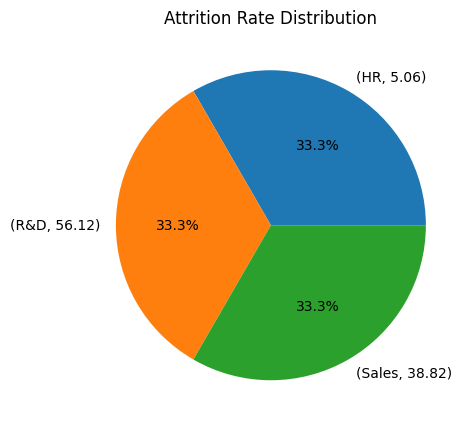

In [47]:
query = """ SELECT 
    department,
    ROUND(
        (CAST(COUNT(attrition) AS NUMERIC) * 100.0) /
        (SELECT COUNT(*) FROM hrdata WHERE attrition = 'Yes'),
        2
    ) AS attrition_rate
FROM hrdata
WHERE attrition = 'Yes'
GROUP BY department
ORDER BY attrition_rate DESC
LIMIT 3; """
cur.execute(query)
data = cur.fetchall()
result = pd.DataFrame(data, columns=['Department','Attrition_Rate'])
result.value_counts().plot(kind="pie",autopct='%1.1f%%', figsize=(5, 8))
plt.title('Attrition Rate Distribution')
plt.ylabel('')  # Optional: Remove the y-label for clarity
plt.show()

## 12. Find the age group (age_band) with the highest job satisfaction. 

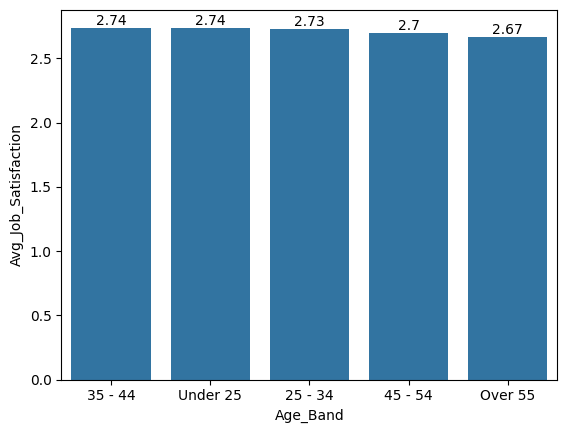

In [57]:
query = """ SELECT 
    age_band, 
    round(AVG(job_satisfaction),2) AS avg_job_satisfaction
FROM hrdata
GROUP BY age_band
ORDER BY avg_job_satisfaction DESC
LIMIT 10;"""
cur.execute(query)
data = cur.fetchall()
result = pd.DataFrame(data,columns=['Age_Band','Avg_Job_Satisfaction'])
result
ax = sns.barplot(data=result,y='Avg_Job_Satisfaction',x='Age_Band')
ax.bar_label(ax.containers[0])
plt.show()

## 13. Calculate the attrition rate for each job role. 

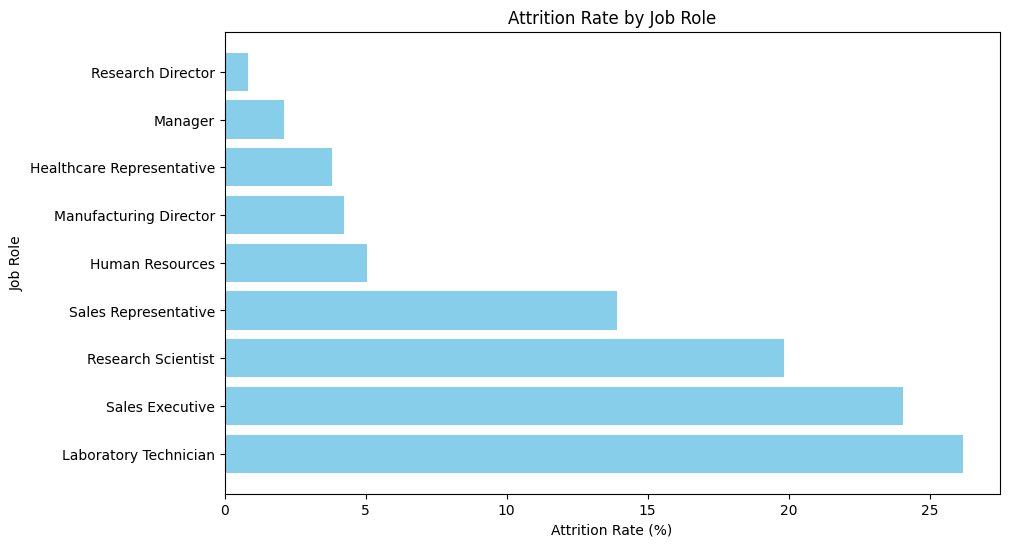

In [67]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming the query has been executed and data is fetched correctly
query = """SELECT 
    job_role,
    ROUND(
        (CAST(COUNT(attrition) AS NUMERIC) * 100.0) /
        (SELECT COUNT(*) FROM hrdata WHERE attrition = 'Yes'),
        2
    ) AS attrition_rate
FROM hrdata
WHERE attrition = 'Yes'
GROUP BY job_role
ORDER BY attrition_rate DESC;"""


cur.execute(query)
data = cur.fetchall()
result = pd.DataFrame(data, columns=['job_role', 'attrition_rate'])


plt.figure(figsize=(10, 6))
ax = plt.barh(result['job_role'], result['attrition_rate'], color='skyblue')
plt.title('Attrition Rate by Job Role')
plt.xlabel('Attrition Rate (%)')
plt.ylabel('Job Role')
plt.show()


## 14. Determine the average age of employees by marital status and gender.  

In [68]:
query = """SELECT 
    marital_status,
    gender,
    ROUND(AVG(age), 0) AS avg_age
FROM hrdata
GROUP BY marital_status, gender;"""
cur.execute(query)
data = cur.fetchall()
result = pd.DataFrame(data, columns=['marital_status','gender','avg_age'])
result

,marital_status,gender,avg_age
0,Married,Female,39
1,Divorced,Female,38
2,Single,Female,35
3,Married,Male,37
4,Single,Male,35
5,Divorced,Male,37


## 15. Rank departments based on the average job satisfaction of their employees.

In [69]:
query = """SELECT 
    department, 
    avg_jobSatisfaction,
    DENSE_RANK() OVER (ORDER BY avg_jobSatisfaction DESC) AS rank
FROM avg_jobSatisfaction;"""

cur.execute(query)
data = cur.fetchall()
result = pd.DataFrame(data,columns=['department','avg_jobSatisfaction','rank'])
result

,department,avg_jobSatisfaction,rank
0,Sales,2.75,1
1,R&D,2.73,2
2,HR,2.60,3


## 16. Find the correlation between attrition and job satisfaction.

In [72]:
query = """WITH data AS (
    SELECT 
        CASE WHEN attrition = 'Yes' THEN 1 ELSE 0 END AS attrition_numeric,
        job_satisfaction
    FROM hrdata
),
stats AS (
    SELECT 
        AVG(attrition_numeric) AS avg_attrition,
        AVG(job_satisfaction) AS avg_job_satisfaction,
        STDDEV(attrition_numeric) AS stddev_attrition,
        STDDEV(job_satisfaction) AS stddev_job_satisfaction
    FROM data
),
covariance AS (
    SELECT 
       round(AVG((attrition_numeric - (SELECT avg_attrition FROM stats)) * 
            (job_satisfaction - (SELECT avg_job_satisfaction FROM stats))),2) AS covar
    FROM data
)
SELECT 
    round((SELECT covar FROM covariance) /
    ((SELECT stddev_attrition FROM stats) * (SELECT stddev_job_satisfaction FROM stats)),2) AS correlation"""
    
cur.execute(query)
data = cur.fetchall()
print(f"The correlation between attrition and job satisfaction is {data[0][0]}")

The correlation between attrition and job satisfaction is -0.10


## 17. Identify the education fields with the highest proportion of employees in senior job roles.

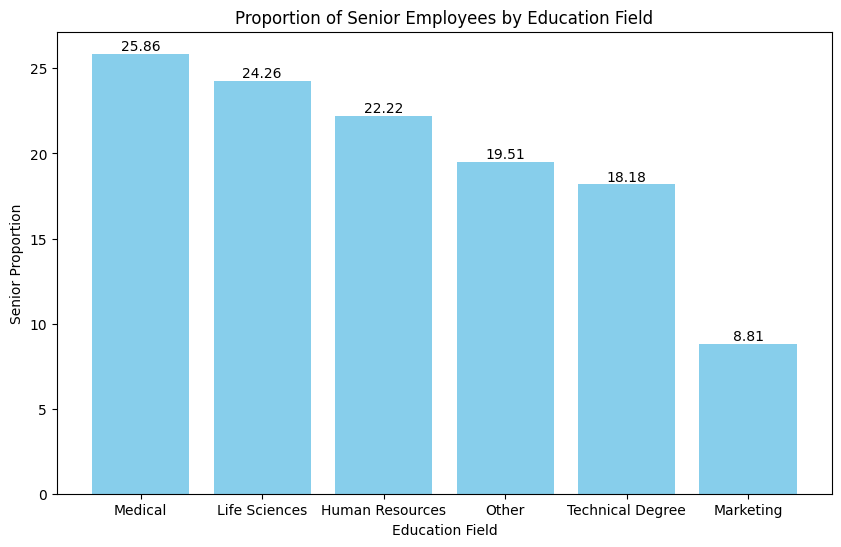

In [78]:
query = """WITH senior_roles AS (
    SELECT 
        education_field,
        COUNT(*) AS senior_count
    FROM hrdata
    WHERE job_role IN ('Manager', 'Manufacturing Director', 'Research Director')
    GROUP BY education_field
),
total_roles AS (
    SELECT 
        education_field,
        COUNT(*) AS total_count
    FROM hrdata
    GROUP BY education_field
)
SELECT 
    sr.education_field,
    ROUND(CAST(sr.senior_count AS NUMERIC) * 100.0 / tr.total_count, 2) AS senior_proportion
FROM senior_roles sr
JOIN total_roles tr ON sr.education_field = tr.education_field
ORDER BY senior_proportion DESC;"""
cur.execute(query)
data = cur.fetchall()
result = pd.DataFrame(data,columns=['education_field', 'senior_proportion'])
result


plt.figure(figsize=(10, 6))

bars = plt.bar(result['education_field'], result['senior_proportion'], color='skyblue')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.02, f'{yval:.2f}', ha='center', va='bottom', color='black')

plt.title('Proportion of Senior Employees by Education Field')
plt.xlabel('Education Field')
plt.ylabel('Senior Proportion')

plt.show()

## 18. Retrieve the department with the highest number of employees eligible for retirement (e.g., age >= 60).

In [79]:
query = """SELECT 
    department,
    COUNT(emp_no) AS retirement_eligible_count
FROM hrdata
WHERE age >= 60
GROUP BY department
ORDER BY retirement_eligible_count DESC
LIMIT 1;
"""

cur.execute(query)
data = cur.fetchall()
result = pd.DataFrame(data,columns=['department','retirement_eligible_count'])
result

,department,retirement_eligible_count
0,Sales,3


##  19. Analyze the attrition rate across different education levels and fields.

In [80]:
query = """SELECT 
    education, 
    education_field,
    ROUND(
        CAST(COUNT(attrition) AS NUMERIC) * 100.0 / 
        (SELECT COUNT(*) FROM hrdata WHERE attrition = 'Yes'),
        2
    ) AS attrition_rate
FROM hrdata
WHERE attrition = 'Yes'
GROUP BY education, education_field
ORDER BY attrition_rate DESC;"""

cur.execute(query)
data = cur.fetchall()
result = pd.DataFrame(data,columns=['education','education_field','attrition_rate'])
result

,education,education_field,attrition_rate
0,Bachelor's Degree,Life Sciences,15.61
1,Master's Degree,Life Sciences,10.55
2,Bachelor's Degree,Medical,10.55
3,Associates Degree,Life Sciences,7.59
4,Bachelor's Degree,Technical Degree,6.75
5,Bachelor's Degree,Marketing,6.33
6,Associates Degree,Medical,6.33
7,Master's Degree,Medical,5.49
8,High School,Medical,4.22
9,Master's Degree,Marketing,3.80


##  20. Create a summary report showing the total employees, attrition count, and active employee count for each department.

In [81]:
query = """SELECT 
    department,
    COUNT(emp_no) AS total_employees,
    COUNT(CASE WHEN attrition = 'Yes' THEN 1 END) AS attrition_count,
    COUNT(CASE WHEN attrition = 'No' THEN 1 END) AS active_employee_count
FROM hrdata
GROUP BY department
ORDER BY department;
"""

cur.execute(query)
data = cur.fetchall()
result = pd.DataFrame(data,columns=['department','total_employee','attrion_count','active_emp_count'])
result

,department,total_employee,attrion_count,active_emp_count
0,HR,63,12,51
1,R&D,961,133,828
2,Sales,446,92,354
